In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop

In [3]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


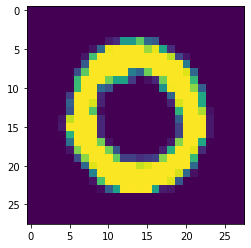

In [6]:
X = train.drop('label', axis = 1)
y = train['label']
X = X.values.reshape(-1, 28, 28, 1)
X = X / 255
y = to_categorical(y)
plt.imshow(X[1][:,:,0])
print(str(y[1]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [8]:
datagen = ImageDataGenerator(zoom_range = 0.1, width_shift_range = 0.1, height_shift_range = 0.1, rotation_range = 10) 

In [9]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [10]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [12]:
hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 35, validation_data = (X_test, y_test), callbacks = [learning_rate_reduction])

Epoch 1/35
1182/1182 [==============================] - 15s 13ms/step - loss: 0.4179 - accuracy: 0.8677 - val_loss: 0.1553 - val_accuracy: 0.9602 - lr: 0.0010
Epoch 2/35
1182/1182 [==============================] - 15s 13ms/step - loss: 0.1662 - accuracy: 0.9537 - val_loss: 0.0507 - val_accuracy: 0.9864 - lr: 0.0010
Epoch 3/35
1182/1182 [==============================] - 16s 13ms/step - loss: 0.1293 - accuracy: 0.9650 - val_loss: 0.0471 - val_accuracy: 0.9881 - lr: 0.0010
Epoch 4/35
1182/1182 [==============================] - 15s 12ms/step - loss: 0.1194 - accuracy: 0.9670 - val_loss: 0.0475 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 5/35
1182/1182 [==============================] - 15s 13ms/step - loss: 0.1115 - accuracy: 0.9709 - val_loss: 0.0404 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 6/35
1182/1182 [==============================] - 15s 12ms/step - loss: 0.0954 - accuracy: 0.9749 - val_loss: 0.0302 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 7/35
1182/1182 [========================

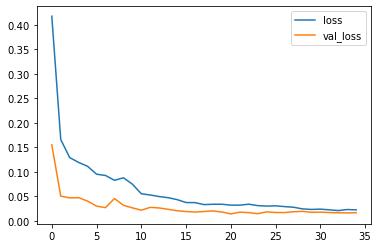

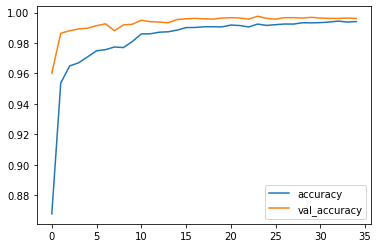

In [13]:
loss = pd.DataFrame(model.history.history)
loss[['loss', 'val_loss']].plot()
loss[['accuracy', 'val_accuracy']].plot()

In [14]:
final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0168, final accuracy: 0.9962


In [15]:
test = test.values.reshape(-1, 28, 28, 1) / 255
y_pred = model.predict(test, batch_size = 64)

y_pred = np.argmax(y_pred,axis = 1)
y_pred = pd.Series(y_pred,name="Label")
y_pred

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [16]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred],axis = 1)
submission.to_csv("submission.csv",index=False)